In [161]:
#Read the data from the file COVID19_line_list_data.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('COVID19_line_list_data.csv')
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
#Extract the columns age and death
df = df[['age','death']]

In [163]:
#Drop rows that do not have age data
df.dropna(subset=['age'], inplace=True)
df.shape

(843, 2)

In [164]:
#Assume that 0 means recovered and nonzero means death
age = np.array(df['age'])
death = np.array(df['death'])

death = convert_death(death).astype(int)


In [165]:
#Function that converts non-zero to one; this indicates death
def convert_death(data):
    for x in range(len(data)):
        if (data[x] != '0'):
            data[x] = 1
    return data

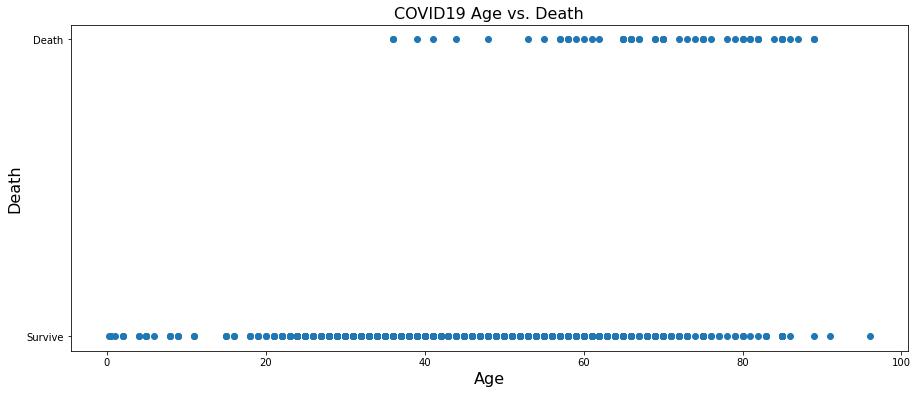

In [166]:
#Make a scatter plot of age vs death
fig, ax = plt.subplots()
ax.scatter(age, death)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Death", fontsize = 16)
ax.set_title("COVID19 Age vs. Death", fontsize=16)
plt.yticks([0,1],['Survive', 'Death'])
fig.set_size_inches(15,6)

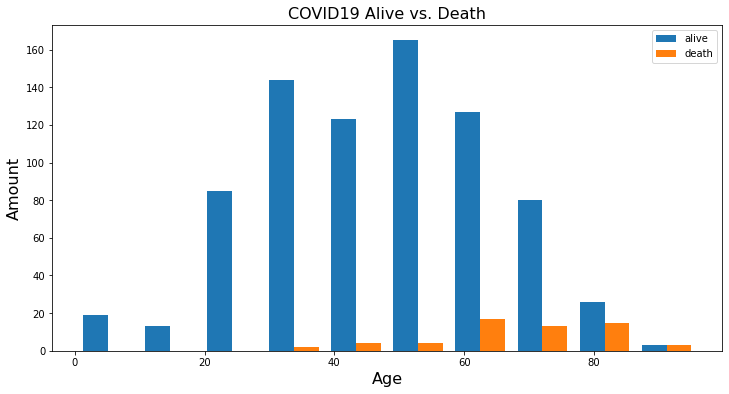

In [168]:
#Create a historgram of the survivors and non-survivors binned into 10 year age intervals

alive = df[df['death'] == '0']['age']          #Get the number alive

death = df[df['death'] != '0']['age']          #Get the number death

hist_data = plt.hist([alive,death], histtype='bar', bins=10, label=['alive','death'])
plt.gcf().set_size_inches(12,6)
plt.xlabel("Age", fontsize =16)
plt.ylabel("Amount", fontsize=16)
plt.title("COVID19 Alive vs. Death", fontsize=16)
plt.legend()

In [172]:
hist_data[0].shape

(2, 10)

In [173]:
hist_data[1].shape

(11,)

In [174]:
hist_data[0] #Alive and Death

array([[ 19.,  13.,  85., 144., 123., 165., 127.,  80.,  26.,   3.],
       [  0.,   0.,   0.,   2.,   4.,   4.,  17.,  13.,  15.,   3.]])

In [175]:
hist_data[1] #Age

array([ 0.25 ,  9.825, 19.4  , 28.975, 38.55 , 48.125, 57.7  , 67.275,
       76.85 , 86.425, 96.   ])

Text(0, 0.5, 'Amount')

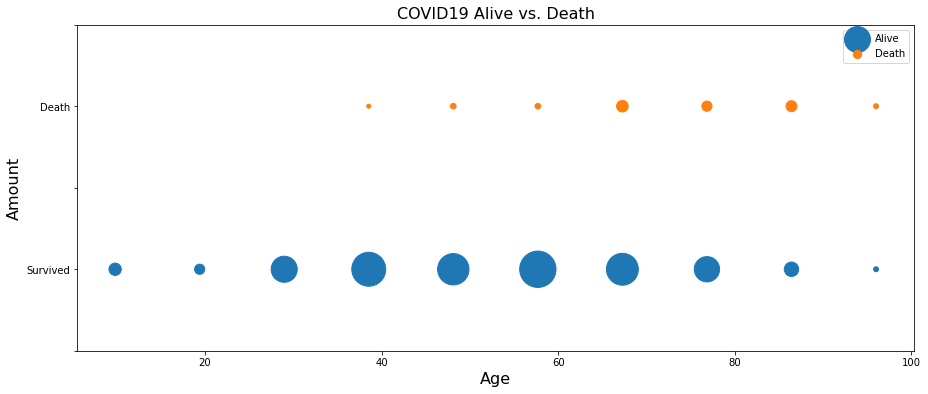

In [189]:
alive_data = hist_data[0][0]               #Get alive data
death_data = hist_data[0][1]               #Get death data
alive_bins = [1] * 10                      #Create y value for alive
death_bins = [3] * 10                      #Create y value for death
age_data = hist_data[1][1:]                #Get age data


fig, ax = plt.subplots()
ax.scatter(x=age_data,y=alive_bins, s= alive_data *8, label='Alive')
ax.scatter(x=age_data,y=death_bins, s= death_data *8, label='Death')
plt.yticks([0,1,2,3,4],['','Survived','','Death',''])
plt.gcf().set_size_inches(15,6)
plt.legend()
plt.title("COVID19 Alive vs. Death", fontsize=16)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Amount", fontsize=16)
